In [20]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
from kan import *

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,5,2], grid=4, k=4, seed=0)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 读取xlsx文件
file_path = 'D:\OneDrive - Officials\OneDrive - Mraz Cindy\done\毕设资料\计算公式说明\数据库.xlsx'  # 替换为你的xlsx文件路径
df = pd.read_excel(file_path, engine='openpyxl')

# 打乱行顺序并按8:2的比例分成训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 输出结果
print("训练集样本数:", len(train_df))
print("测试集样本数:", len(test_df))

训练集样本数: 307
测试集样本数: 77


In [7]:
# 提取第2，3，4，5列的数据
input = train_df.iloc[:, 1:5]
output = train_df.iloc[:, 5:7]
test_input = test_df.iloc[:, 1:5]
test_label = test_df.iloc[:, 5:7]
# 将DataFrame转换为numpy数组并调整其维度为4
array1 = input.to_numpy()
array2 = output.to_numpy()
array3 = test_input.to_numpy()
array4 = test_label.to_numpy()
input=torch.tensor(array1, dtype=torch.float32)
ouput=torch.tensor(array2, dtype=torch.float32)
test_input=torch.tensor(array3, dtype=torch.float32)
test_label=torch.tensor(array4, dtype=torch.float32)
def normalize_columns(tensor):
    # 确保输入是2D张量
    assert tensor.dim() == 2, "Input tensor must be 2D"
    
    # 获取最小值和最大值
    col_min = tensor.min(dim=0, keepdim=True).values
    col_max = tensor.max(dim=0, keepdim=True).values
    
    # 防止除以零的情况
    denom = col_max - col_min
    denom[denom == 0] = 1  # 如果列中所有值相等，避免除以零
    
    # 进行归一化
    normalized_tensor = (tensor - col_min) / denom
    return normalized_tensor
# 对每一列进行归一化
input= normalize_columns(input)
ouput= normalize_columns(ouput)
test_input= normalize_columns(test_input)
test_label= normalize_columns(test_label)
dataset={'train_input':input,'test_input':test_input,'train_label':ouput,'test_label':test_label}

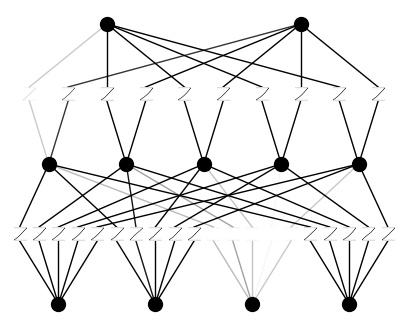

In [8]:
model(input)
model.plot(beta=100)

train loss: 3.00e-01 | test loss: 3.45e-01 | reg: 6.97e+01 : 100%|██| 50/50 [00:08<00:00,  6.06it/s]


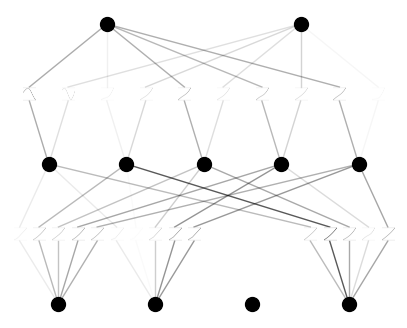

In [21]:
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.);
model.plot()

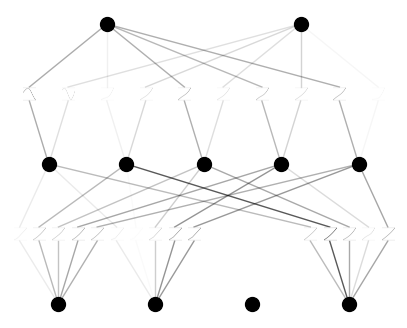

In [10]:
model.prune()
model.plot(mask=True)

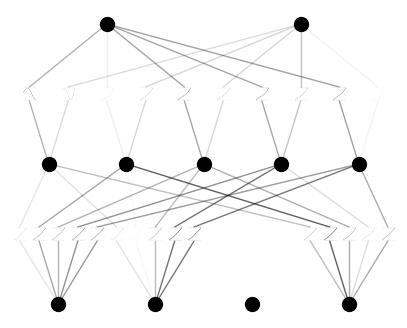

In [22]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [23]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.02e-02 | test loss: 7.78e-02 | reg: 4.17e+01 : 100%|██| 50/50 [00:24<00:00,  2.05it/s]


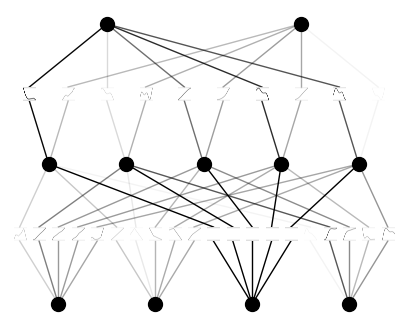

In [24]:
model.plot()

In [25]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^4, r2=0.6195691227912903
fixing (0,0,1) with abs, r2=0.9981733560562134
fixing (0,0,2) with sqrt, r2=0.9887145757675171
fixing (0,0,3) with tanh, r2=0.9955770373344421
fixing (0,0,4) with x^4, r2=0.977741539478302
fixing (0,1,0) with x^3, r2=1.0000004768371582
fixing (0,1,1) with x^4, r2=1.0000003576278687
fixing (0,1,2) with x^3, r2=1.0000005960464478
fixing (0,1,3) with x^2, r2=1.0000005960464478
fixing (0,1,4) with exp, r2=1.0000007152557373
fixing (0,2,0) with exp, r2=3.065221157391813e-18
fixing (0,2,1) with exp, r2=1.2260884629567253e-17
fixing (0,2,2) with abs, r2=0.0
fixing (0,2,3) with exp, r2=1.9617415407307604e-16
fixing (0,2,4) with exp, r2=1.2260884629567253e-17
fixing (0,3,0) with abs, r2=0.964542031288147
fixing (0,3,1) with tanh, r2=0.997870683670044
fixing (0,3,2) with exp, r2=0.9883575439453125
fixing (0,3,3) with tanh, r2=0.7624975442886353
fixing (0,3,4) with x^4, r2=0.6394785046577454
fixing (1,0,0) with x^4, r2=0.993114173412323
fixing (1,0,1

In [26]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: nan | test loss: nan | reg: nan :  10%|█▊                | 5/50 [00:02<00:23,  1.94it/s]


RuntimeError: false INTERNAL ASSERT FAILED at "..\\aten\\src\\ATen\\native\\BatchLinearAlgebra.cpp":1538, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.

In [17]:
model.symbolic_formula()

([nan, nan], [x_1, x_2, x_3, x_4])